In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
import json
import plotly.plotly as py
import plotly.graph_objs as graph_objs

%matplotlib inline

In [2]:
df = pd.read_csv('Population_Colorado.csv')

with open('colorado_counties.geojson') as f:
    counties = json.load(f)

# Denver Population

In [3]:
denver_pop = df[df['county'] == 'Denver'].copy()

In [4]:
denver_pop_yr = denver_pop.groupby('year').sum()

denver_pop_yr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 1990 to 2040
Data columns (total 5 columns):
fipsCode            51 non-null int64
age                 51 non-null int64
malePopulation      51 non-null int64
femalePopulation    51 non-null int64
totalPopulation     51 non-null int64
dtypes: int64(5)
memory usage: 2.4 KB


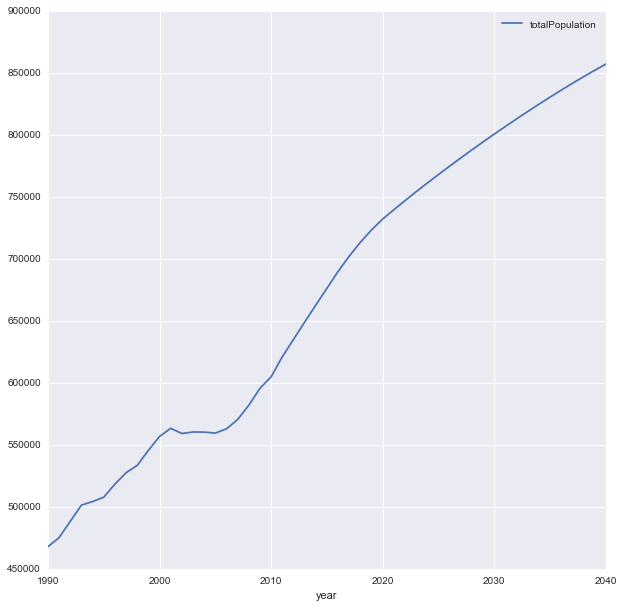

In [5]:
denver_pop_yr.plot(y = 'totalPopulation', figsize = (10,10))

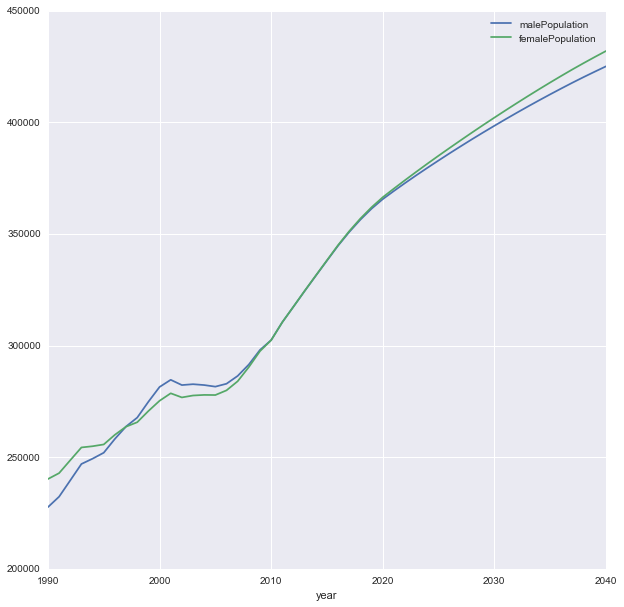

In [6]:
denver_pop_yr.plot(y = ['malePopulation', 'femalePopulation'], figsize = (10,10))

In [7]:
bins = [0, 21, 34,44,54,64,90]
print bins


denver_pop['age_groups'] = pd.cut(denver_pop['age'], bins, right=False)

[0, 21, 34, 44, 54, 64, 90]


In [8]:
denver_pop.head()

,county,fipsCode,year,age,malePopulation,femalePopulation,totalPopulation,age_groups
925,Denver,31,1993,68,1638,2119,3757,"[64, 90)"
971,Denver,31,1996,36,4851,4163,9014,"[34, 44)"
979,Denver,31,2010,5,4116,4020,8136,"[0, 21)"
1028,Denver,31,1993,33,5009,4627,9636,"[21, 34)"
1063,Denver,31,1990,88,194,588,782,"[64, 90)"


In [9]:
denver_pop_cats = denver_pop.groupby(['year', 'age_groups']).sum()
#denver_pop_cats
#denver_pop_cats.pivot(index = 'year', columns='cats', values='totalPopulation')

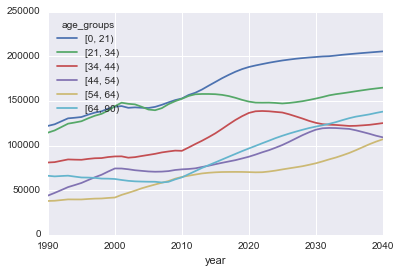

In [10]:
denver_pop_cats.unstack('age_groups')['totalPopulation'].plot()

# State Wide Population

In [11]:
d = {}
for x in range(len(counties['features'])):
    name = counties['features'][x]['properties']['name'][:-11]
    if name in df['county'].unique():
        d[name] = counties['features'][x]
    else:
        print 'not in: ', name

ser = pd.Series(d.values(), index = d.keys())
ser.name = 'coordinates'

full_df = df.groupby(['county', 'year'], as_index=False).sum()
full_df.drop(['fipsCode', 'age'], inplace = True, axis=1)

full_df = full_df.join(ser, on='county')

full_df

,county,year,malePopulation,femalePopulation,totalPopulation,coordinates
0,Adams,1990,131902,133807,265709,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
1,Adams,1991,136193,137427,273620,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
2,Adams,1992,140356,141030,281386,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
3,Adams,1993,145351,145431,290782,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
4,Adams,1994,150673,150120,300793,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
5,Adams,1995,156912,155675,312587,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
6,Adams,1996,162499,160540,323039,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
7,Adams,1997,167740,165010,332750,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
8,Adams,1998,173782,170243,344025,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."
9,Adams,1999,179864,175445,355309,"{u'geometry': {u'type': u'MultiPolygon', u'coo..."


In [12]:
# colors from
# https://gka.github.io/palettes/#colors=lightyellow,orange,deeppink,darkred|steps=7|bez=1|coL=1

colors = ['#ffffe0','#fffddb','#fffad7','#fff7d1','#fff5cd','#fff2c8',
          '#fff0c4','#ffedbf','#ffebba','#ffe9b7','#ffe5b2','#ffe3af',
          '#ffe0ab','#ffdda7','#ffdba4','#ffd9a0','#ffd69c','#ffd399',
          '#ffd196','#ffcd93','#ffca90','#ffc88d','#ffc58a','#ffc288',
          '#ffbf86','#ffbd83','#ffb981','#ffb67f','#ffb47d','#ffb17b',
          '#ffad79','#ffaa77','#ffa775','#ffa474','#ffa172','#ff9e70',
          '#ff9b6f','#ff986e','#ff956c','#fe916b','#fe8f6a','#fd8b69',
          '#fc8868','#fb8567','#fa8266','#f98065','#f87d64','#f77a63',
          '#f67862','#f57562','#f37261','#f37060','#f16c5f','#f0695e',
          '#ee665d','#ed645c','#ec615b','#ea5e5b','#e85b59','#e75859',
          '#e55658','#e45356','#e35056','#e14d54','#df4a53','#dd4852',
          '#db4551','#d9434f','#d8404e','#d53d4d','#d43b4b','#d2384a',
          '#cf3548','#cd3346','#cc3045','#ca2e43','#c72b42','#c52940',
          '#c2263d','#c0233c','#be213a','#bb1e37','#ba1c35','#b71933',
          '#b41731','#b2152e','#b0122c','#ac1029','#aa0e27','#a70b24',
          '#a40921','#a2071f','#a0051c','#9d0419','#990215','#970212',
          '#94010e','#91000a','#8e0006','#8b0000']

scl = dict(zip(np.arange(0, 100, 1), colors))

In [13]:
max_pop = full_df['totalPopulation'].max()

full_df['totalPopulation'].describe()
max_pop / 10000

95

In [14]:
def get_scl(obj):
    frac = obj / 10000
    frac = int(frac)
    return scl[frac]
    
full_df['color'] = full_df['totalPopulation'].apply(get_scl)

In [15]:
df_1990 = full_df[full_df['year'] == 2040]


In [16]:
layers_ls = []
for x in df_1990.index:
    item_dict = dict(sourcetype = 'geojson',
                     source = df_1990.ix[x]['coordinates'],
                     type = 'fill',
                     color = df_1990.ix[x]['color'])
    layers_ls.append(item_dict)
    

In [23]:
mapbox_access_token = os.environ['MAPBOX_AT']

In [44]:
data = graph_objs.Data([
    graph_objs.Scattermapbox()
])
layout = graph_objs.Layout(
    height=700,
    width=900,
    autosize=True,
    hovermode='closest',
    mapbox=dict(
        layers= layers_ls,
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(
            lat=39.03,
            lon=-105.78
        ),
        pitch=0,
        zoom=6,
        style='light'
    ),
)

fig = dict(data=data, layout=layout)
fn = 'test.jpeg'
py.image.save_as(fig, filename=fn)
py.iplot(fig, filename=fn)

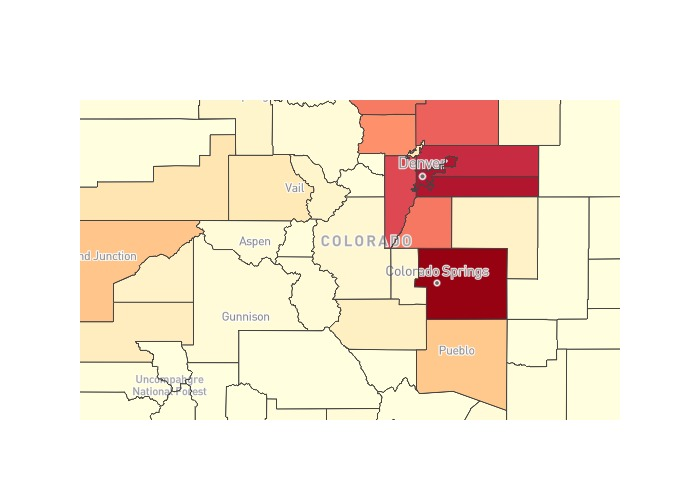

In [45]:
from IPython.display import Image

Image('test.jpeg')

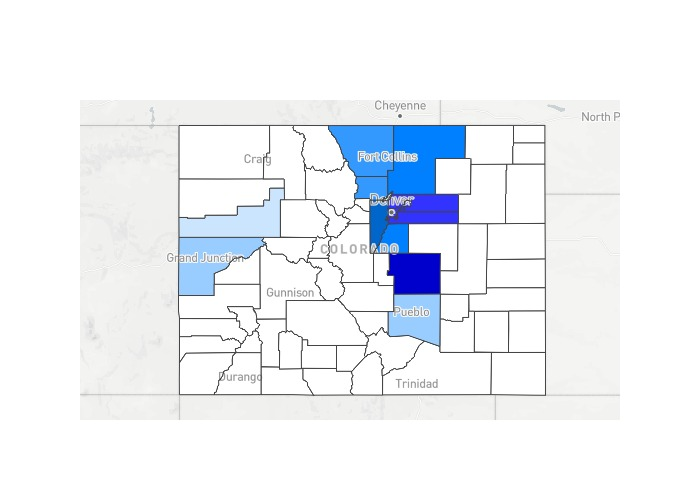

In [46]:
Image('colorado_county_population2040.jpeg')